# Dataset analysis

[FlavorDB2](https://cosylab.iiitd.edu.in/flavordb2/) is a dataset that we want to use in our project. It is a newer version of FlavorDB. It is a resource with extensive coverage of 25595 flavor molecules. Among molecules listed in the database, 2254 have been reported to be found in 936 natural entities/ingredients. These natural ingredients have further been classified into 34 categories, and mapped to 527 distinct natural sources. An additional 13869 compounds were identified as synthetic. For the remaining 9472 molecules no specific source could be ascertained.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import json
import csv
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np

#### Get ids of all available molecules in flavordb2 database
As there is no downloadable dataset as a whole, we have to scrape the website to obtain ids of available molecules. Then, for each molecule, there is a universal url under which there is a JSON file with a data of it.

There are 512 pages of molecules on FlavorDB2 website. On each page, despite the last one, there are 50 molecules identified by a unique id. Unfortunately, the ids are not from 1 to 25595, so we have to scrape them that later on we will have proper urls to JSON files.

In [63]:
def get_molecules_ids(start=1, end=513):
    molecules_id_lst = []
    for page_number in range(start, end):
        print('page number: ', page_number, end='\r')
        html_page = urllib.request.urlopen("https://cosylab.iiitd.edu.in/flavordb2/molecules?common_name=&fema_number=&cas_id=&functional_group=&flavor_profile=&fema_flavor=&description=&iofi=&coe=&trade_association_guidelines=&natural_occurrence=&aroma_threshold_values=&taste_threshold_values=&synthesis=&foodCategory=&molecular_weight_from=&h_bond_donors=&h_bond_acceptors=&type=&smile=&page={}".format(page_number))
        soup = BeautifulSoup(html_page, "html.parser")
        for table in soup.find_all('table'):
            for link in table.findAll('a'):
                molecules_id_lst.append(int(str(link).split('>')[-2].split('<')[0]))
    return molecules_id_lst

In [65]:
molecules_id_lst = []

In [94]:
m = get_molecules_ids(start = 1, end = 513)
for mol in m:
    molecules_id_lst.append(mol)

In [6]:
len(molecules_id_lst)

25595

#### Get JSON data of molecules from flavordb2
Now, when we already have all ids of available molecules, we can get JSONs from FlavorDB2 website. There is a common url for each molecule that differs only by the id at the end of it. So, iterating through the ids, we can get the data and place it in a dataframe.

In [2]:
# JSON files are at addresses of this form
def flavordb_entity_url(x):
    return "https://cosylab.iiitd.edu.in/flavordb2/molecules_json?id="+str(x)


# translates the JSON file at the specified web address into a dictionary
def get_flavordb_entity(x):
    with urllib.request.urlopen(flavordb_entity_url(x)) as url:
        return json.loads(url.read().decode())
    return None

#### Create empty dataframe with molecules attributes
All molecules have the same number of attributes, so they can be easily placed in one dataframe and the set of columns may be fixed from the beginning.

In [103]:
columns = ['bond_stereo_count', 'undefined_atom_stereocenter_count', 'taste', 'supersweetdb_id', 'heavy_atom_count', 'fema_number', 'common_name', 'hba_count', 'synthetic', 'charge', 'isotope_atom_count', 'fooddb_id', 'molecular_weight', 'fenoroli_and_os', 'fooddb_flavor_profile', 'flavornet_id', 'exact_mass', 'smile', 'bitter', 'iupac_name', 'volume3d', 'unknown_natural', 'odor', 'covalently_bonded_unit_count', 'functional_groups', 'bitterdb_id', 'inchi', 'undefined_bond_stereocenter_count', 'num_rotatablebonds', 'defined_bond_stereocenter_count', 'xlogp', 'topological_polor_surfacearea', 'defined_atom_stereocenter_count', 'atom_stereo_count', 'natural', 'flavor_profile', 'hbd_count', 'fema_flavor_profile', 'complexity', 'super_sweet', 'pubchem_id', 'monoisotopic_mass', 'cas_id']

In [104]:
data = pd.DataFrame(columns=columns)
data

,bond_stereo_count,undefined_atom_stereocenter_count,taste,supersweetdb_id,heavy_atom_count,fema_number,common_name,hba_count,synthetic,charge,...,atom_stereo_count,natural,flavor_profile,hbd_count,fema_flavor_profile,complexity,super_sweet,pubchem_id,monoisotopic_mass,cas_id


#### Append molecules data to dataframe
Download JSON for a given molecule and append its data to the dataframe at the next available index.

In [ ]:
for id in molecules_id_lst:
    data.loc[len(data.index)] = list(get_flavordb_entity(id).values())

#### Save molecules data to csv
To have the data stored somewhere, we saved the dataframe into a csv file. Now, we have the FlavorDB2 molecules dataset as a whole.

In [ ]:
data.to_csv('molecules.csv', index=False)

## EDA
Let's see, how the dataset looks like. Calculate some statistics, see what atributes there are and plot some visualisations.

In [4]:
data = pd.read_csv('molecules.csv')

See how many molecules and attributes there are.

In [5]:
data.shape

(25595, 43)

Basic info about the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25595 entries, 0 to 25594
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bond_stereo_count                  25595 non-null  int64  
 1   undefined_atom_stereocenter_count  25595 non-null  int64  
 2   taste                              415 non-null    object 
 3   supersweetdb_id                    21980 non-null  float64
 4   heavy_atom_count                   25595 non-null  int64  
 5   fema_number                        2120 non-null   object 
 6   common_name                        25595 non-null  object 
 7   hba_count                          25595 non-null  int64  
 8   synthetic                          25595 non-null  int64  
 9   charge                             25595 non-null  int64  
 10  isotope_atom_count                 25595 non-null  int64  
 11  fooddb_id                          2681 non-null   obj

Calculate nan values for each attribute.

In [7]:
data.isnull().sum()

bond_stereo_count                        0
undefined_atom_stereocenter_count        0
taste                                25180
supersweetdb_id                       3615
heavy_atom_count                         0
fema_number                          23475
common_name                              0
hba_count                                0
synthetic                                0
charge                                   0
isotope_atom_count                       0
fooddb_id                            22914
molecular_weight                         0
fenoroli_and_os                          0
fooddb_flavor_profile                22914
flavornet_id                             0
exact_mass                               0
smile                                    0
bitter                                   0
iupac_name                             549
volume3d                              7605
unknown_natural                          0
odor                                 25051
covalently_

Get rid of columns with foraign ids and with many nan values.

In [8]:
clean_columns = ['bond_stereo_count', 'undefined_atom_stereocenter_count', 'heavy_atom_count', 'common_name', 'hba_count', 'synthetic', 'charge', 'isotope_atom_count', 'molecular_weight', 'fenoroli_and_os', 'exact_mass', 'smile', 'unknown_natural', 'covalently_bonded_unit_count', 'functional_groups', 'inchi', 'undefined_bond_stereocenter_count', 'num_rotatablebonds', 'defined_bond_stereocenter_count', 'topological_polor_surfacearea', 'defined_atom_stereocenter_count', 'atom_stereo_count', 'natural', 'hbd_count', 'complexity', 'monoisotopic_mass', 'flavor_profile']
clean_df = data[clean_columns]
clean_df.shape

(25595, 27)

Get only these molecules that don't have nan values.

In [9]:
clean_df = clean_df[clean_df['flavor_profile'].notna()]
clean_df = clean_df[clean_df['functional_groups'].notna()]

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25069 entries, 0 to 25594
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bond_stereo_count                  25069 non-null  int64  
 1   undefined_atom_stereocenter_count  25069 non-null  int64  
 2   heavy_atom_count                   25069 non-null  int64  
 3   common_name                        25069 non-null  object 
 4   hba_count                          25069 non-null  int64  
 5   synthetic                          25069 non-null  int64  
 6   charge                             25069 non-null  int64  
 7   isotope_atom_count                 25069 non-null  int64  
 8   molecular_weight                   25069 non-null  float64
 9   fenoroli_and_os                    25069 non-null  int64  
 10  exact_mass                         25069 non-null  float64
 11  smile                              25069 non-null  obj

<b>SMILE</b>

The simplified molecular-input line-entry system (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings. SMILES strings can be imported by most molecule editors for conversion back into two-dimensional drawings or three-dimensional models of the molecules.

Example:

CC(C)CC(=O)

Signs meaning in SMILE:

\-	Single bond

=	Double bond

\#	Triple bond

\*	Aromatic bond

.	Disconnected structures

<b>flavor_profile</b>

flavor_profile is the target variable here. Let's see some more information about it.

In [11]:
clean_df.flavor_profile.describe()

count          25069
unique          2094
top       sweet-like
freq           13782
Name: flavor_profile, dtype: object

Get 10 most frequent flavors.

In [12]:
clean_df.flavor_profile.value_counts()[:10]

sweet-like         13782
sweet               8171
bitter               596
odorless             114
fruity                31
bland                 12
odorless@sweet        12
odorless@bitter       11
floral@fruity         10
minty                  9
Name: flavor_profile, dtype: int64

sweet-like         0.549763
sweet              0.325940
bitter             0.023774
odorless           0.004547
fruity             0.001237
bland              0.000479
odorless@sweet     0.000479
odorless@bitter    0.000439
floral@fruity      0.000399
minty              0.000359
Name: flavor_profile, dtype: float64


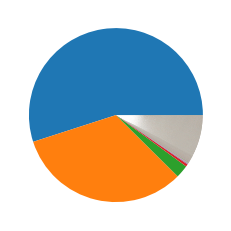

In [13]:
print(clean_df.flavor_profile.value_counts(normalize=True)[:10])
plt.pie(clean_df.flavor_profile.value_counts(normalize=True))
plt.show()

See how the attributes are correlated between each other.

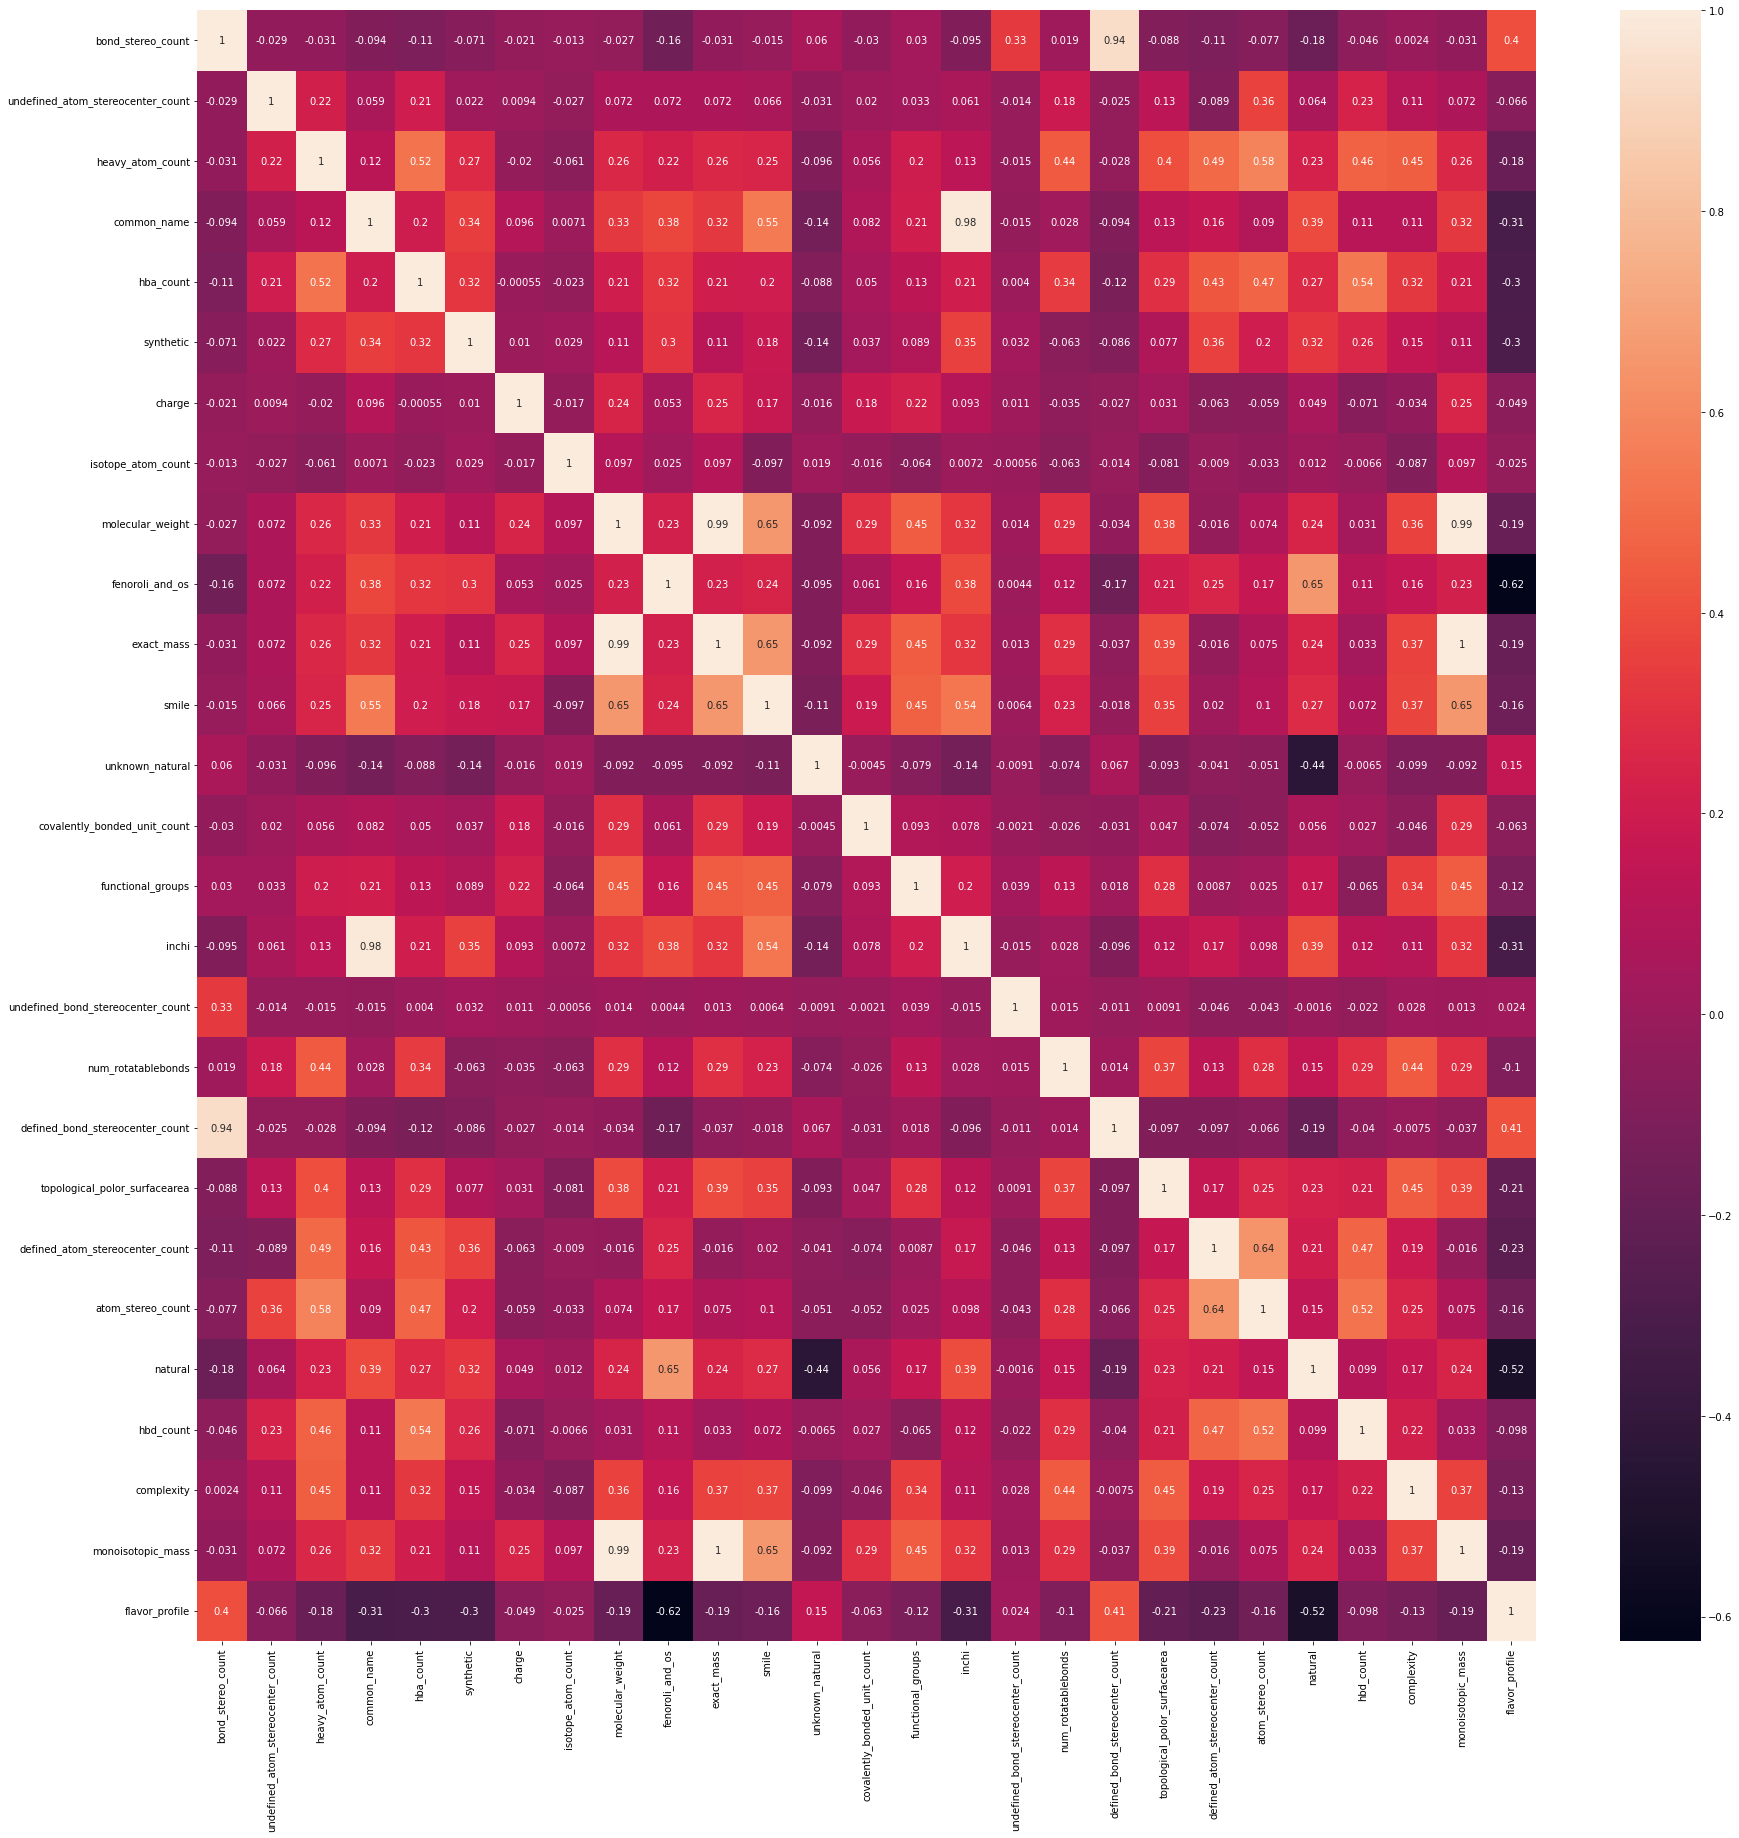

In [14]:
fig, ax = plt.subplots(figsize=(30,30))

corrmat = clean_df.apply(lambda x: x.factorize()[0]).corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True)

plt.show()

Correlations with flavor_profile.

In [15]:
clean_df.apply(lambda x: x.factorize()[0]).corr()[:-1:]['flavor_profile']

bond_stereo_count                    0.399905
undefined_atom_stereocenter_count   -0.066291
heavy_atom_count                    -0.183839
common_name                         -0.311290
hba_count                           -0.304339
synthetic                           -0.300153
charge                              -0.049264
isotope_atom_count                  -0.025093
molecular_weight                    -0.187758
fenoroli_and_os                     -0.624404
exact_mass                          -0.188320
smile                               -0.164937
unknown_natural                      0.154957
covalently_bonded_unit_count        -0.063459
functional_groups                   -0.121110
inchi                               -0.314930
undefined_bond_stereocenter_count    0.023565
num_rotatablebonds                  -0.103615
defined_bond_stereocenter_count      0.414959
topological_polor_surfacearea       -0.207147
defined_atom_stereocenter_count     -0.234011
atom_stereo_count                 

In [16]:
df_num_corr = clean_df.apply(lambda x: x.factorize()[0]).corr()[:-1:]['flavor_profile']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with flavor_profile:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with flavor_profile:
natural           -0.515066
fenoroli_and_os   -0.624404
Name: flavor_profile, dtype: float64


Leave only 5 most frequent flavors.

In [17]:
flavors = ['sweet-like', 'sweet', 'bitter', 'odorless', 'fruity']
grouped_df = clean_df.loc[(clean_df['flavor_profile'] == 'sweet-like') | (clean_df['flavor_profile'] == 'sweet') | (clean_df['flavor_profile'] == 'bitter') | (clean_df['flavor_profile'] == 'odorless') | (clean_df['flavor_profile'] == 'fruity')]

In [18]:
grouped_df.shape

(22694, 27)

In [19]:
len(grouped_df)

22694

sweet-like    0.607297
sweet         0.360051
bitter        0.026262
odorless      0.005023
fruity        0.001366
Name: flavor_profile, dtype: float64


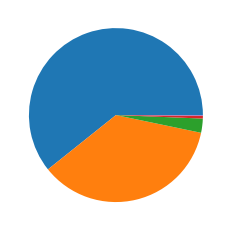

In [20]:
print(grouped_df.flavor_profile.value_counts(normalize=True))
plt.pie(grouped_df.flavor_profile.value_counts(normalize=True))
plt.show()

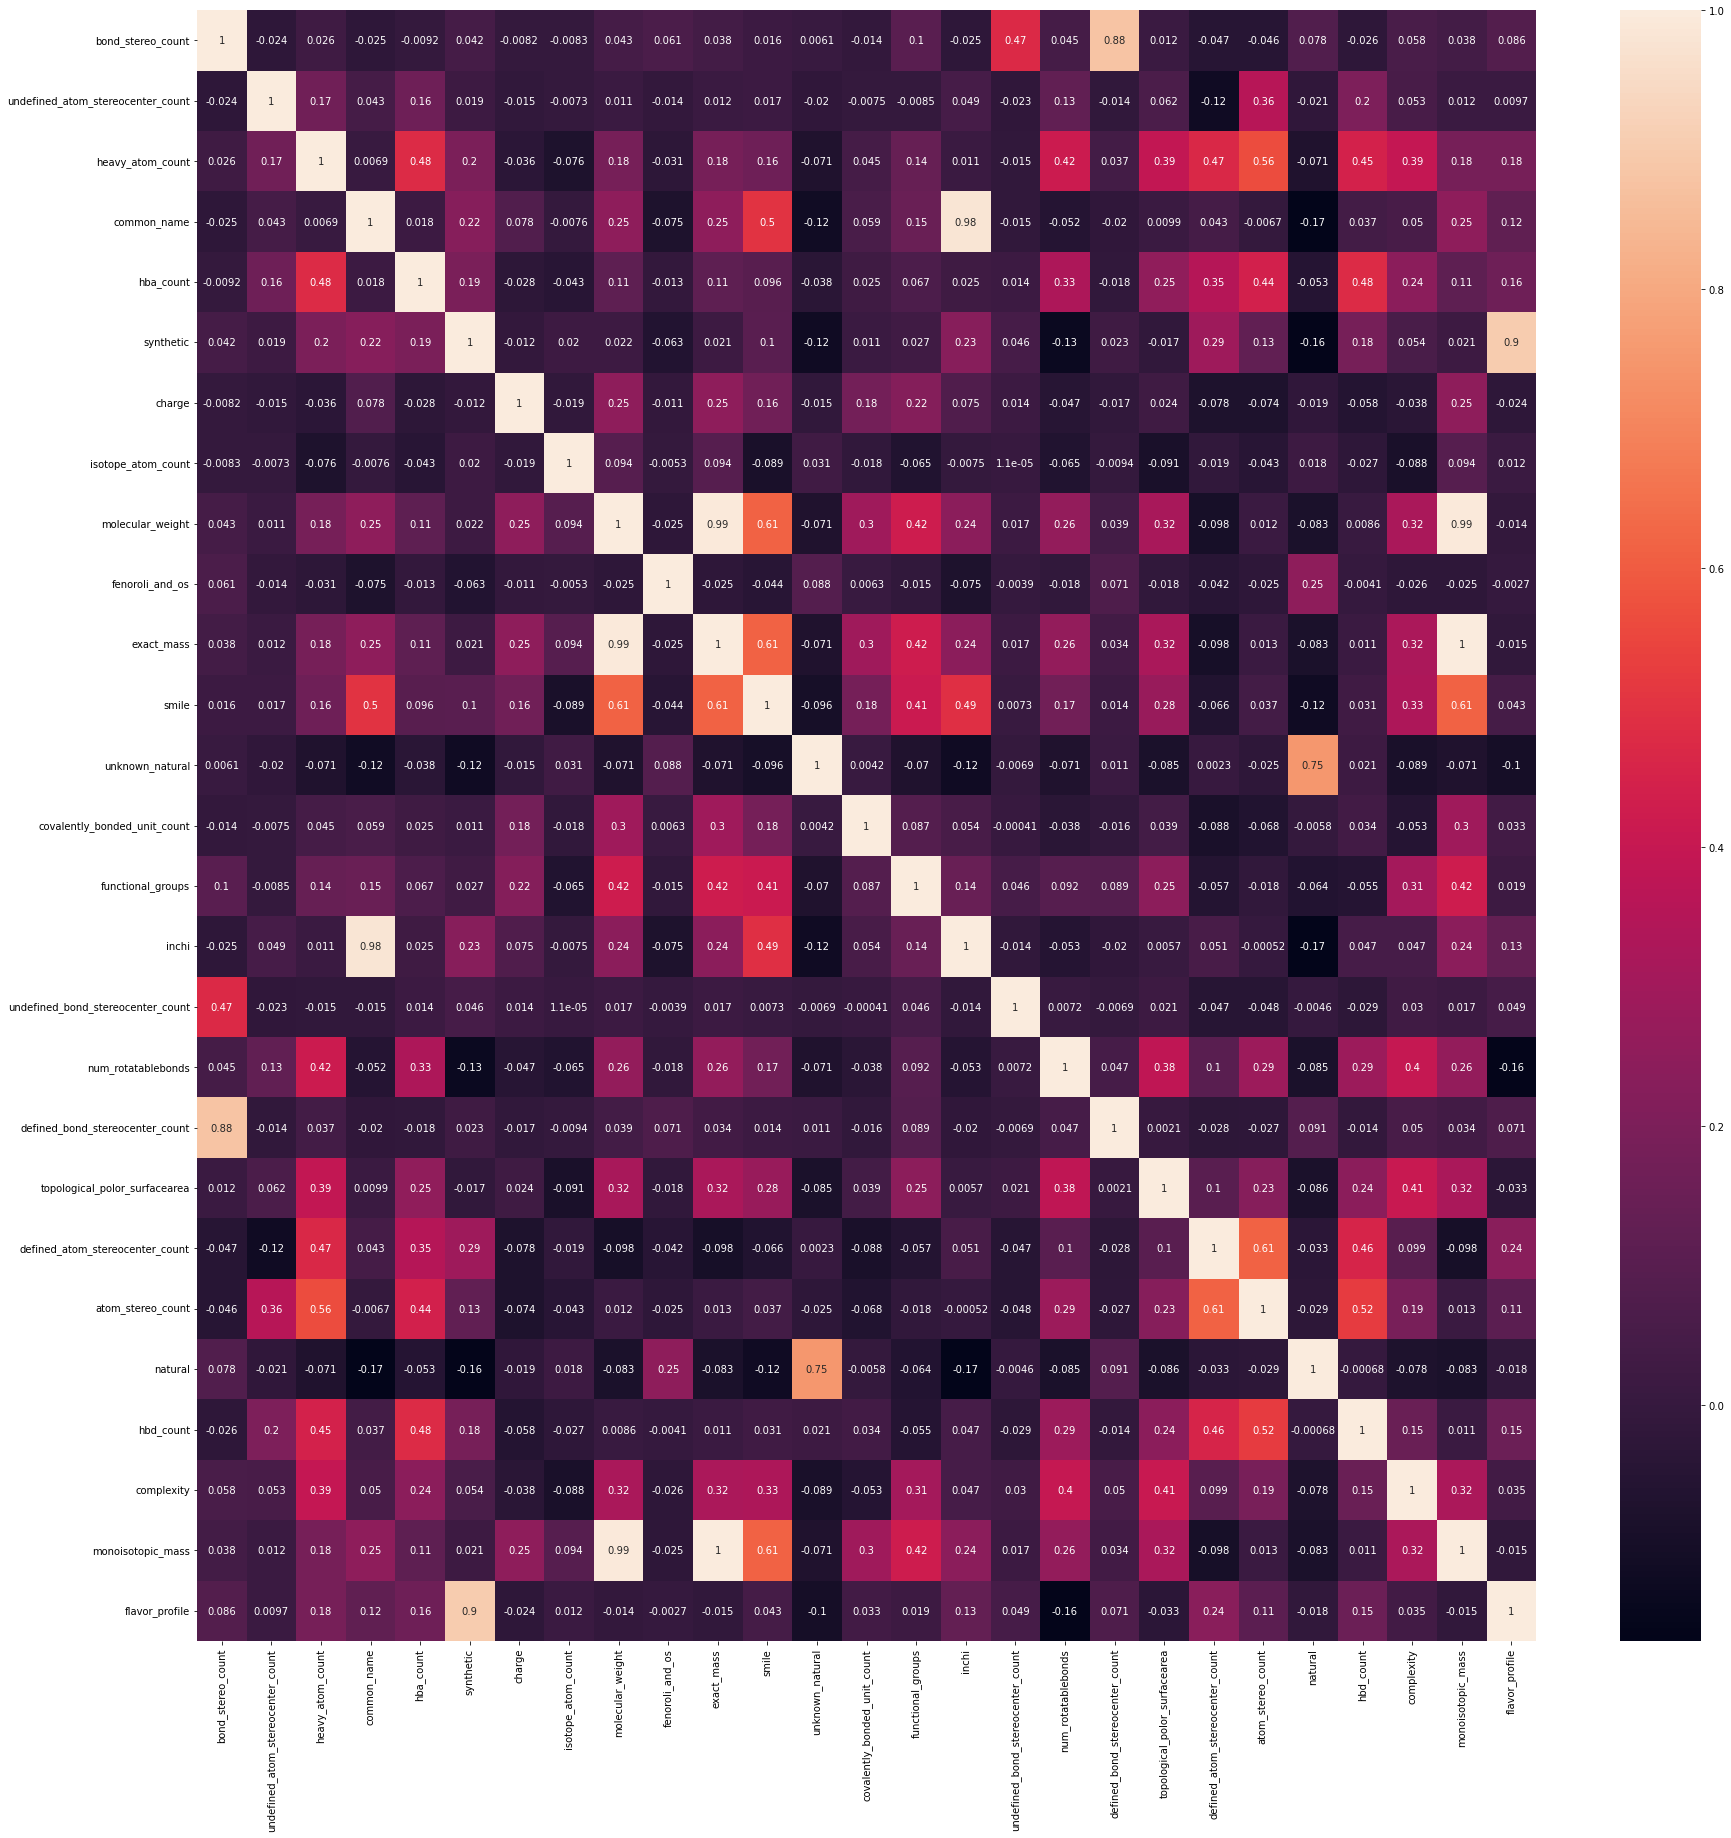

In [21]:
fig, ax = plt.subplots(figsize=(30,30))

corrmat = grouped_df.apply(lambda x: x.factorize()[0]).corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True)

plt.show()

## ChemTastesDB
[ChemTastesDB](https://zenodo.org/record/5747393#.Y4RkSXbMK5c) is a database that includes curated information of 2944 molecular tastants. ChemTastesDB constitutes a useful tool for the scientific community to expand the information of molecular tastants, which could assist in the analysis of the relationships between molecular structure and taste, as well as in silico (QSAR) studies for taste prediction by means of diverse machine learning approaches.

In [19]:
chem_data = pd.read_excel('ChemTastesDB_database.xlsx')

In [20]:
chem_data.shape

(2947, 8)

In [21]:
chem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2944 non-null   object
 1   Name                  2946 non-null   object
 2   PubChem CID           2944 non-null   object
 3   CAS number            2944 non-null   object
 4   canonical SMILES      2944 non-null   object
 5   Taste                 2944 non-null   object
 6   Class taste           2944 non-null   object
 7   Reference_(cod)/[pp]  2944 non-null   object
dtypes: object(8)
memory usage: 184.3+ KB


In [22]:
chem_data = chem_data.dropna()

In [23]:
chem_data = chem_data[['Name', 'canonical SMILES', 'Class taste']]

In [24]:
chem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 2943
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              2944 non-null   object
 1   canonical SMILES  2944 non-null   object
 2   Class taste       2944 non-null   object
dtypes: object(3)
memory usage: 92.0+ KB


Bitterness       0.401834
Sweetness        0.331861
Non-sweetness    0.079144
Tastelessness    0.068954
Multitaste       0.038383
Umaminess        0.033288
Miscellaneous    0.029552
Sourness         0.012908
Saltiness        0.004076
Name: Class taste, dtype: float64


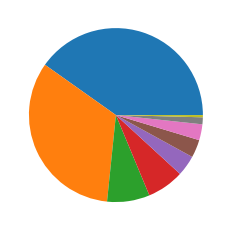

In [25]:
print(chem_data['Class taste'].value_counts(normalize=True))
plt.pie(chem_data['Class taste'].value_counts(normalize=True))
plt.show()

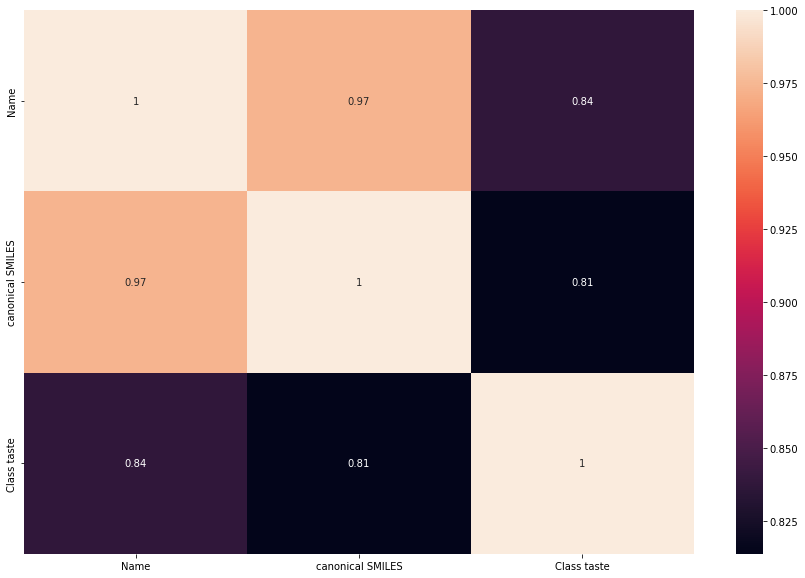

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

chem_data['Name']=chem_data['Name'].astype('category').cat.codes
chem_data['canonical SMILES']=chem_data['canonical SMILES'].astype('category').cat.codes
chem_data['Class taste']=chem_data['Class taste'].astype('category').cat.codes

corrmat = chem_data.apply(lambda x: x.factorize()[0]).corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True)

plt.show()